<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Etude-spécifique-des-parametres" data-toc-modified-id="Etude-spécifique-des-parametres-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Etude spécifique des parametres</a></span></li></ul></div>

In [1]:
# %%script pypy3
from algo_gen.classes import Population
from algo_gen.tools.plot import show_stats


Population parameters :
	Individuals : <class 'algo_gen.individuals.onemax.IndividualOneMax'>
	Size of an individual : 50
	Size of the population : 100
	Number of individuals selected each turns : 4
	Selection : ['adaptative', 'UCB', [[0.25, ['select_random']], [0.25, ['select_best']], [0.25, ['select_tournament', 2, 5]], [0.25, ['select_wheel']]]]
	Crossover : uniforme (100%)
	Mutation : ['n-flip', 5] (20.0%)
	Insertion : age
select_random
select_random
0
0.0
select_best
0
0.0
select_tournament
0
0.0
select_wheel
0
0.0
[[0.0, ['select_random']], [0.0, ['select_best']], [0.0, ['select_tournament', 2, 5]], [0.0, ['select_wheel']]]
select_wheel
select_random
0
1.1774100225154747
select_best
0
1.1774100225154747
select_tournament
0
1.1774100225154747
select_wheel
1.25
1.1774100225154747
[[1.1774100225154747, ['select_random']], [1.1774100225154747, ['select_best']], [1.1774100225154747, ['select_tournament', 2, 5]], [2.427410022515475, ['select_wheel']]]
select_wheel
select_random
0
1.482

select_wheel
select_random
0.75
1.1296963303603753
select_best
1.5
1.383589786838768
select_tournament
7.0
0.9223931912258454
select_wheel
14.0
0.5325439572529198
[[1.8796963303603753, ['select_random']], [2.883589786838768, ['select_best']], [7.922393191225845, ['select_tournament', 2, 5]], [14.53254395725292, ['select_wheel']]]
select_wheel
select_random
0.75
1.1328647465180266
select_best
1.5
1.3874702882782857
select_tournament
7.0
0.9249801921855239
select_wheel
14.0
0.5244144763250629
[[1.8828647465180266, ['select_random']], [2.8874702882782857, ['select_best']], [7.924980192185524, ['select_tournament', 2, 5]], [14.524414476325063, ['select_wheel']]]
select_random
select_random
1.0
1.0516926507720632
select_best
1.5
1.3912586048085904
select_tournament
7.0
0.9275057365390603
select_wheel
14.0
0.5258463253860316
[[2.051692650772063, ['select_random']], [2.8912586048085904, ['select_best']], [7.92750573653906, ['select_tournament', 2, 5]], [14.525846325386032, ['select_wheel']]]


select_wheel
select_random
1.0
1.0694287001132172
select_best
2.0
1.0694287001132172
select_tournament
5.25
0.6174349478894776
select_wheel
15.25
0.4006446988097175
[[2.0694287001132174, ['select_random']], [3.0694287001132174, ['select_best']], [5.867434947889477, ['select_tournament', 2, 5]], [15.650644698809717, ['select_wheel']]]
select_tournament
select_random
1.0
1.0706268582786642
select_best
2.0
1.0706268582786642
select_tournament
5.25
0.6056380092874338
select_wheel
15.25
0.4010935699848328
[[2.070626858278664, ['select_random']], [3.070626858278664, ['select_best']], [5.855638009287434, ['select_tournament', 2, 5]], [15.651093569984832, ['select_wheel']]]
select_wheel
select_random
1.0
1.0718115331221472
select_best
2.0
1.0718115331221472
select_tournament
5.25
0.6063081625796961
select_wheel
15.0
0.3980608102103631
[[2.071811533122147, ['select_random']], [3.071811533122147, ['select_best']], [5.856308162579696, ['select_tournament', 2, 5]], [15.398060810210364, ['select_wh

select_random
1.5
0.8123020694608764
select_best
0.5
0.9485644551232686
select_tournament
2.0
0.5317765314962489
select_wheel
9.25
0.3517371138498953
[[2.3123020694608765, ['select_random']], [1.4485644551232686, ['select_best']], [2.531776531496249, ['select_tournament', 2, 5]], [9.601737113849895, ['select_wheel']]]
select_wheel
select_random
1.5
0.8128818739604798
select_best
0.5
0.9492415209094106
select_tournament
2.0
0.5321561026402074
select_wheel
9.25
0.3498086622536461
[[2.31288187396048, ['select_random']], [1.4492415209094105, ['select_best']], [2.5321561026402075, ['select_tournament', 2, 5]], [9.599808662253647, ['select_wheel']]]
select_wheel
select_random
1.5
0.813457200698345
select_best
0.5
0.9499133577963745
select_tournament
2.0
0.5325327424010072
select_wheel
9.0
0.3479152065977412
[[2.313457200698345, ['select_random']], [1.4499133577963745, ['select_best']], [2.532532742401007, ['select_tournament', 2, 5]], [9.347915206597742, ['select_wheel']]]
select_wheel
selec

select_random
select_random
2.0
0.6744471885635438
select_best
0.5
0.89709862392858
select_tournament
0.25
0.49909959960553857
select_wheel
2.0
0.3098122727490887
[[2.6744471885635437, ['select_random']], [1.39709862392858, ['select_best']], [0.7490995996055385, ['select_tournament', 2, 5]], [2.3098122727490886, ['select_wheel']]]
select_wheel
select_random
2.0
0.6747909153037831
select_best
0.5
0.8975558232332919
select_tournament
0.25
0.4993539618170447
select_wheel
1.0
0.30855799404296314
[[2.674790915303783, ['select_random']], [1.3975558232332919, ['select_best']], [0.7493539618170447, ['select_tournament', 2, 5]], [1.308557994042963, ['select_wheel']]]
select_best
select_random
2.0
0.6751326449417595
select_best
-0.75
0.8653444413361523
select_tournament
0.25
0.4996068461471738
select_wheel
1.0
0.3087142549071918
[[2.6751326449417596, ['select_random']], [0.11534444133615229, ['select_best']], [0.7496068461471739, ['select_tournament', 2, 5]], [1.3087142549071917, ['select_wheel'

select_random
select_random
-4.75
0.4722430974215185
select_best
-2.75
0.8535285041149757
select_tournament
-1.25
0.4983532794489545
select_wheel
-5.5
0.29218550948588323
[[-4.277756902578481, ['select_random']], [-1.8964714958850242, ['select_best']], [-0.7516467205510455, ['select_tournament', 2, 5]], [-5.207814490514116, ['select_wheel']]]
select_random
select_random
-4.75
0.4676776728104574
select_best
-2.75
0.8538587034660268
select_tournament
-1.25
0.49854607433357156
select_wheel
-5.5
0.2922985455065359
[[-4.282322327189543, ['select_random']], [-1.8961412965339732, ['select_best']], [-0.7514539256664284, ['select_tournament', 2, 5]], [-5.207701454493464, ['select_wheel']]]
select_random
select_random
-5.0
0.46324815158605975
select_best
-2.75
0.8541873856612865
select_tournament
-1.25
0.4987379833900524
select_wheel
-5.5
0.29241106216440715
[[-4.536751848413941, ['select_random']], [-1.8958126143387135, ['select_best']], [-0.7512620166099476, ['select_tournament', 2, 5]], [-5.2

select_random
-10.75
0.40722716125371256
select_best
-2.75
0.8670528372468617
select_tournament
-1.25
0.5062497887467009
select_wheel
-11.75
0.2706018945166916
[[-10.342772838746287, ['select_random']], [-1.8829471627531382, ['select_best']], [-0.7437502112532991, ['select_tournament', 2, 5]], [-11.479398105483309, ['select_wheel']]]
select_wheel
select_random
-10.75
0.40735542621019016
select_best
-2.75
0.8673259341937619
select_tournament
-1.25
0.5064092430103126
select_wheel
-13.0
0.2698125292037612
[[-10.34264457378981, ['select_random']], [-1.882674065806238, ['select_best']], [-0.7435907569896874, ['select_tournament', 2, 5]], [-12.730187470796238, ['select_wheel']]]
select_wheel
select_random
-10.75
0.40748319697017743
select_best
-2.75
0.8675979789159829
select_tournament
-1.25
0.506568082907073
select_wheel
-13.0
0.26903071261244405
[[-10.342516803029822, ['select_random']], [-1.882402021084017, ['select_best']], [-0.743431917092927, ['select_tournament', 2, 5]], [-12.73096928

select_wheel
select_random
-15.0
0.3710931465128442
select_best
-2.75
0.8781666646925846
select_tournament
-1.25
0.5127388659457675
select_wheel
-17.25
0.25210814839496953
[[-14.628906853487155, ['select_random']], [-1.8718333353074152, ['select_best']], [-0.7372611340542325, ['select_tournament', 2, 5]], [-16.99789185160503, ['select_wheel']]]
select_random
select_random
-15.0
0.3690017497604523
select_best
-2.75
0.8783998619737831
select_tournament
-1.25
0.5128750238236631
select_wheel
-17.25
0.252175095749199
[[-14.630998250239548, ['select_random']], [-1.871600138026217, ['select_best']], [-0.7371249761763369, ['select_tournament', 2, 5]], [-16.997824904250802, ['select_wheel']]]
select_wheel
select_random
-15.0
0.3690993862935677
select_best
-2.75
0.8786322834115345
select_tournament
-1.25
0.5130107287065807
select_wheel
-17.5
0.25155169097791763
[[-14.630900613706432, ['select_random']], [-1.8713677165884655, ['select_best']], [-0.7369892712934193, ['select_tournament', 2, 5]], [

select_wheel
select_random
-23.25
0.33707117880378284
select_best
-2.75
0.8875496559381101
select_tournament
-1.25
0.5182173525290562
select_wheel
-20.75
0.24008297220567626
[[-22.912928821196218, ['select_random']], [-1.86245034406189, ['select_best']], [-0.7317826474709438, ['select_tournament', 2, 5]], [-20.509917027794323, ['select_wheel']]]
select_wheel
select_random
-23.25
0.337148581832326
select_best
-2.75
0.8877534675828664
select_tournament
-1.25
0.5183363528917443
select_wheel
-20.75
0.2395545348868593
[[-22.912851418167673, ['select_random']], [-1.8622465324171336, ['select_best']], [-0.7316636471082557, ['select_tournament', 2, 5]], [-20.51044546511314, ['select_wheel']]]
select_random
select_random
-23.5
0.3356160790074695
select_best
-2.75
0.8879566810483696
select_tournament
-1.25
0.5184550039929945
select_wheel
-20.75
0.2396093707269759
[[-23.16438392099253, ['select_random']], [-1.8620433189516303, ['select_best']], [-0.7315449960070055, ['select_tournament', 2, 5]], 

select_wheel
select_random
-23.75
0.3128942611947528
select_best
-2.75
0.895992808702505
select_tournament
-1.25
0.5231470916634131
select_wheel
-24.75
0.2288159189762644
[[-23.437105738805247, ['select_random']], [-1.854007191297495, ['select_best']], [-0.7268529083365869, ['select_tournament', 2, 5]], [-24.521184081023737, ['select_wheel']]]
select_wheel
select_random
-23.75
0.31295724513728584
select_best
-2.75
0.8961731672663146
select_tournament
-1.25
0.5232523983770353
select_wheel
-25.0
0.2283660688695193
[[-23.437042754862713, ['select_random']], [-1.8538268327336853, ['select_best']], [-0.7267476016229647, ['select_tournament', 2, 5]], [-24.77163393113048, ['select_wheel']]]
select_wheel
select_random
-23.75
0.3130200641332838
select_best
-2.75
0.8963530534951292
select_tournament
-1.25
0.5233574293064364
select_wheel
-25.0
0.22791910947529462
[[-23.436979935866717, ['select_random']], [-1.8536469465048708, ['select_best']], [-0.7266425706935636, ['select_tournament', 2, 5]], 

select_wheel
select_random
-29.25
0.2955839770807959
select_best
-2.75
0.903023966125893
select_tournament
-1.25
0.527252403136169
select_wheel
-26.5
0.2194461913757339
[[-28.954416022919204, ['select_random']], [-1.846976033874107, ['select_best']], [-0.722747596863831, ['select_tournament', 2, 5]], [-26.280553808624266, ['select_wheel']]]
select_wheel
select_random
-29.25
0.29563725838169963
select_best
-2.75
0.9031867431889044
select_tournament
-1.25
0.527347444464935
select_wheel
-28.25
0.21905496128385085
[[-28.9543627416183, ['select_random']], [-1.8468132568110955, ['select_best']], [-0.722652555535065, ['select_tournament', 2, 5]], [-28.030945038716148, ['select_wheel']]]
select_random
select_random
-29.25
0.2946399995703604
select_best
-2.75
0.9033491328717412
select_tournament
-1.25
0.5274422596124084
select_wheel
-28.25
0.21909434656707716
[[-28.95536000042964, ['select_random']], [-1.8466508671282589, ['select_best']], [-0.7225577403875916, ['select_tournament', 2, 5]], [-2

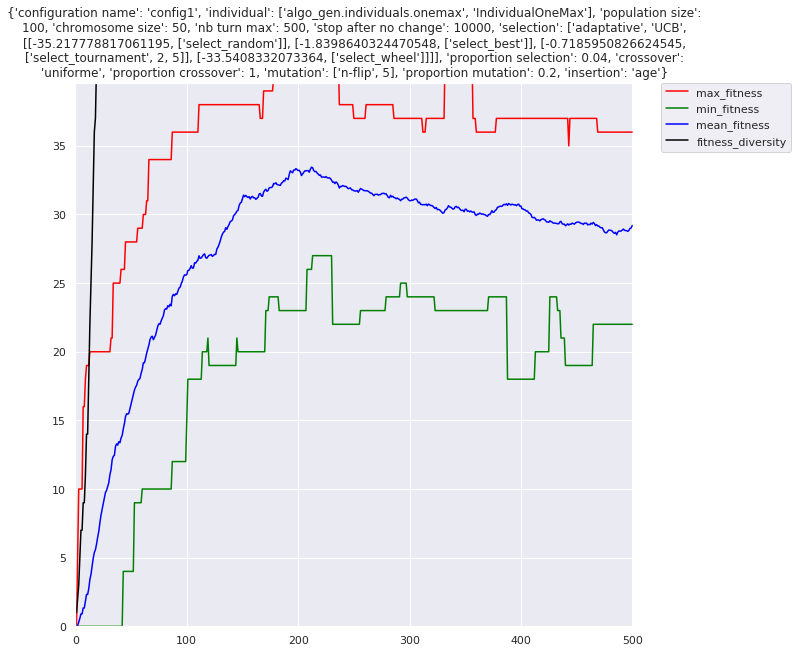

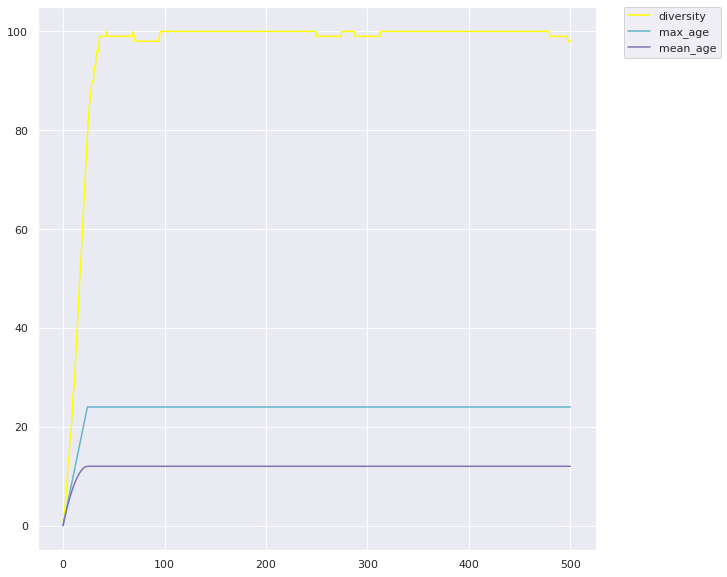

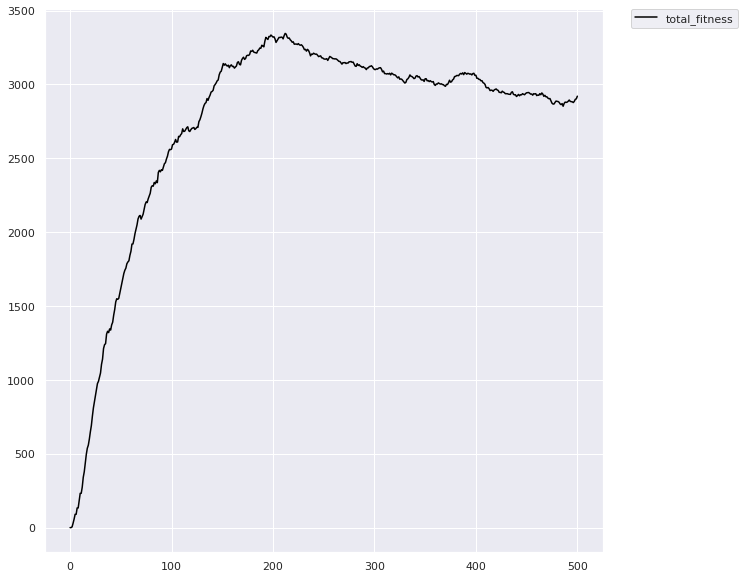

In [2]:
parameters = {
    'configuration name': 'config1',
    'individual': ['algo_gen.individuals.onemax', 'IndividualOneMax'],

    'population size': 100,  # 100 200 500
    'chromosome size': 50,  # 5 10 50 100

    'nb turn max': 500,
    'stop after no change': 10000,  # int(config['nb turn max']*0.10),

    # ['select_random']
    # ['select_best']
    # ['select_tournament', 2, 5]
    # ['select_wheel']
    # ['adaptative',
    #               'UCB', #'fixed roulette wheel' 'adaptive roulette wheel' 'adaptive pursuit' 'UCB' 'DMAB'
    #               [
    #                   [0.25, ['select_random']],
    #                   [0.25, ['select_best']],
    #                   [0.25, ['select_tournament', 2, 5]],
    #                   [0.25, ['select_wheel']]]
    #               ],

    'selection': ['adaptative',
                  'UCB',
                  [
                      [0.25, ['select_random']],
                      [0.25, ['select_best']],
                      [0.25, ['select_tournament', 2, 5]],
                      [0.25, ['select_wheel']]]
                  ],

    'proportion selection': 0.04,  # 2 / config['population size']

    'crossover': 'uniforme',  # 'mono-point' 'uniforme'
    'proportion crossover': 1,

    # ['n-flip', 1] ['n-flip', 3] ['n-flip', 5] ['bit-flip']
    'mutation': ['adaptative',
                  'UCB',
                  [
                      [0.25, ['n-flip', 1]],
                      [0.25, ['n-flip', 3]],
                      [0.25, ['n-flip', 5]],
                      [0.25, ['bit-flip']]]
                  ],
#     'mutation': ['n-flip', 5],
    'proportion mutation': 0.2,  # 0.1 0.2 0.5 0.8

    'insertion': 'age',  # 'age' 'fitness'
}
population = Population(parameters)
population.start()
show_stats(population.stats)

Population parameters :
	Individuals : <class 'algo_gen.individuals.onemax.IndividualOneMax'>
	Size of an individual : 50
	Size of the population : 100
	Number of individuals selected each turns : 4
	Selection : ['adaptative', 'UCB', [[-35.217778817061195, ['select_random']], [-1.8398640324470548, ['select_best']], [-0.7185950826624545, ['select_tournament', 2, 5]], [-33.5408332073364, ['select_wheel']]]]
	Crossover : uniforme (100%)
	Mutation : ['n-flip', 5] (20.0%)
	Insertion : age
select_wheel
select_random
0
0.0
select_best
0
0.0
select_tournament
0
0.0
select_wheel
1.25
0.0
[[0.0, ['select_random']], [0.0, ['select_best']], [0.0, ['select_tournament', 2, 5]], [1.25, ['select_wheel']]]
select_wheel
select_random
0
1.1774100225154747
select_best
0
1.1774100225154747
select_tournament
0
1.1774100225154747
select_wheel
1.25
0.8325546111576977
[[1.1774100225154747, ['select_random']], [1.1774100225154747, ['select_best']], [1.1774100225154747, ['select_tournament', 2, 5]], [2.082554611

select_random
select_random
21.75
0.6464604581611711
select_best
0.0
1.9393813744835136
select_tournament
4.0
1.119702358619403
select_wheel
14.5
0.6652023235513134
[[22.396460458161172, ['select_random']], [1.9393813744835136, ['select_best']], [5.119702358619403, ['select_tournament', 2, 5]], [15.165202323551313, ['select_wheel']]]
select_wheel
select_random
21.75
0.6484331229045959
select_best
0.0
1.9452993687137876
select_tournament
4.0
1.1231191141813144
select_wheel
16.5
0.6484331229045959
[[22.398433122904596, ['select_random']], [1.9452993687137876, ['select_best']], [5.123119114181314, ['select_tournament', 2, 5]], [17.148433122904596, ['select_wheel']]]
select_tournament
select_random
21.75
0.6503556710472884
select_best
0.0
1.9510670131418653
select_tournament
6.5
1.0428891859733187
select_wheel
16.5
0.6503556710472884
[[22.40035567104729, ['select_random']], [1.9510670131418653, ['select_best']], [7.542889185973319, ['select_tournament', 2, 5]], [17.15035567104729, ['select

select_wheel
select_random
46.25
0.43865309208254327
select_best
0.0
2.126449758881935
select_tournament
7.25
1.0024180295719436
select_wheel
27.25
0.5157398213787897
[[46.688653092082546, ['select_random']], [2.126449758881935, ['select_best']], [8.252418029571944, ['select_tournament', 2, 5]], [27.76573982137879, ['select_wheel']]]
select_random
select_random
46.5
0.43457831539863906
select_best
0.0
2.1289902520099186
select_tournament
7.25
1.0036156295175134
select_wheel
27.25
0.5163559814674856
[[46.93457831539864, ['select_random']], [2.1289902520099186, ['select_best']], [8.253615629517514, ['select_tournament', 2, 5]], [27.766355981467484, ['select_wheel']]]
select_random
select_random
46.75
0.430628149750988
select_best
0.0
2.131500594011178
select_tournament
7.25
1.0047990160856386
select_wheel
27.25
0.516964828833816
[[47.18062814975099, ['select_random']], [2.131500594011178, ['select_best']], [8.254799016085638, ['select_tournament', 2, 5]], [27.766964828833817, ['select_wh

select_random
57.0
0.37309676359234073
select_best
0.0
2.2229805268173863
select_tournament
7.0
0.9075279998076555
select_wheel
33.25
0.4239057537883672
[[57.37309676359234, ['select_random']], [2.2229805268173863, ['select_best']], [7.907527999807655, ['select_tournament', 2, 5]], [33.67390575378837, ['select_wheel']]]
select_random
select_random
57.25
0.3707634724598753
select_best
0.0
2.2245808347592515
select_tournament
7.0
0.9081813227891378
select_wheel
33.25
0.42421092053913545
[[57.62076347245988, ['select_random']], [2.2245808347592515, ['select_best']], [7.9081813227891375, ['select_tournament', 2, 5]], [33.67421092053914, ['select_wheel']]]
select_random
select_random
58.75
0.36847806416379464
select_best
0.0
2.2261686947761308
select_tournament
7.0
0.9088295639265246
select_wheel
33.25
0.424513713563746
[[59.118478064163796, ['select_random']], [2.2261686947761308, ['select_best']], [7.908829563926525, ['select_tournament', 2, 5]], [33.67451371356375, ['select_wheel']]]
sel

select_tournament
select_random
75.5
0.3174946097380008
select_best
0.0
1.869357646369405
select_tournament
7.75
0.785287284640966
select_wheel
36.0
0.40160244463934314
[[75.817494609738, ['select_random']], [1.869357646369405, ['select_best']], [8.535287284640965, ['select_tournament', 2, 5]], [36.401602444639344, ['select_wheel']]]
select_tournament
select_random
75.5
0.31765438621245157
select_best
0.0
1.8702983847790144
select_tournament
8.0
0.763546118243357
select_wheel
36.0
0.4018045476696537
[[75.81765438621245, ['select_random']], [1.8702983847790144, ['select_best']], [8.763546118243356, ['select_tournament', 2, 5]], [36.401804547669656, ['select_wheel']]]
select_wheel
select_random
75.5
0.31781324426723623
select_best
0.0
1.8712337156800465
select_tournament
8.0
0.7639279654847213
select_wheel
34.75
0.3989483686517566
[[75.81781324426724, ['select_random']], [1.8712337156800465, ['select_best']], [8.763927965484722, ['select_tournament', 2, 5]], [35.14894836865176, ['select_

select_random
80.0
0.28421878077150947
select_best
0.0
1.9136459866514057
select_tournament
6.5
0.7232901968709212
select_wheel
47.25
0.36381716059795116
[[80.28421878077151, ['select_random']], [1.9136459866514057, ['select_best']], [7.223290196870921, ['select_tournament', 2, 5]], [47.613817160597954, ['select_wheel']]]
select_random
select_random
80.0
0.28328542325043504
select_best
0.0
1.9143612033422885
select_tournament
6.5
0.7235605233705782
select_wheel
47.25
0.36395313564636883
[[80.28328542325043, ['select_random']], [1.9143612033422885, ['select_best']], [7.223560523370578, ['select_tournament', 2, 5]], [47.61395313564637, ['select_wheel']]]
select_random
select_random
80.0
0.2823621431122931
select_best
0.0
1.915073229330013
select_tournament
6.5
0.7238296438977974
select_wheel
47.25
0.3640885040869962
[[80.2823621431123, ['select_random']], [1.915073229330013, ['select_best']], [7.223829643897798, ['select_tournament', 2, 5]], [47.61408850408699, ['select_wheel']]]
select_

select_random
select_random
85.0
0.2594864848948659
select_best
0.0
1.9418190459497597
select_tournament
6.0
0.6865367076141337
select_wheel
49.75
0.35257270502083826
[[85.25948648489486, ['select_random']], [1.9418190459497597, ['select_best']], [6.686536707614134, ['select_tournament', 2, 5]], [50.10257270502084, ['select_wheel']]]
select_random
select_random
83.75
0.2587974514877679
select_best
0.0
1.9424181176666746
select_tournament
6.0
0.6867485114508574
select_wheel
49.75
0.3526814774299743
[[84.00879745148777, ['select_random']], [1.9424181176666746, ['select_best']], [6.686748511450857, ['select_tournament', 2, 5]], [50.102681477429975, ['select_wheel']]]
select_wheel
select_random
83.75
0.25887696650839964
select_best
0.0
1.9430149219080375
select_tournament
6.0
0.6869595136139117
select_wheel
48.25
0.3508672633984175
[[84.0088769665084, ['select_random']], [1.9430149219080375, ['select_best']], [6.686959513613912, ['select_tournament', 2, 5]], [48.60086726339842, ['select_wh

0.644433889539885
select_wheel
48.0
0.32078803775241593
[[81.7473891145932, ['select_random']], [0.9550118081446044, ['select_best']], [6.644433889539885, ['select_tournament', 2, 5]], [48.320788037752415, ['select_wheel']]]
select_wheel
select_random
81.5
0.24745251878339056
select_best
-0.75
1.7054487913688883
select_tournament
6.0
0.6445990536739654
select_wheel
47.75
0.31945982807504986
[[81.74745251878339, ['select_random']], [0.9554487913688883, ['select_best']], [6.644599053673965, ['select_tournament', 2, 5]], [48.06945982807505, ['select_wheel']]]
select_random
select_random
81.75
0.24686692114906028
select_best
-0.75
1.7058843645382828
select_tournament
6.0
0.6447636848573925
select_wheel
47.75
0.31954141840512196
[[81.99686692114906, ['select_random']], [0.9558843645382828, ['select_best']], [6.644763684857392, ['select_tournament', 2, 5]], [48.06954141840512, ['select_wheel']]]
select_wheel
select_random
81.75
0.24692975229911607
select_best
-0.75
1.7063185364232287
select_

select_random
79.5
0.23512093622717098
select_best
-0.75
1.541791085086005
select_tournament
5.25
0.6191982003353181
select_wheel
46.75
0.3023701087975743
[[79.73512093622718, ['select_random']], [0.791791085086005, ['select_best']], [5.869198200335318, ['select_tournament', 2, 5]], [47.052370108797575, ['select_wheel']]]
select_wheel
select_random
79.5
0.2351727837561057
select_best
-0.75
1.5421310720696313
select_tournament
5.25
0.6193347423937302
select_wheel
46.75
0.3012802354686909
[[79.7351727837561, ['select_random']], [0.7921310720696313, ['select_best']], [5.86933474239373, ['select_tournament', 2, 5]], [47.05128023546869, ['select_wheel']]]
select_wheel
select_random
79.5
0.2352244843524792
select_best
-0.75
1.5424700955520203
select_tournament
5.25
0.6194708975007335
select_wheel
46.5
0.3002028351969928
[[79.73522448435249, ['select_random']], [0.7924700955520203, ['select_best']], [5.869470897500733, ['select_tournament', 2, 5]], [46.80020283519699, ['select_wheel']]]
selec

select_random
select_random
77.75
0.22474906226960506
select_best
-0.75
1.5571071792176692
select_tournament
3.5
0.6061031474836414
select_wheel
46.25
0.2833446622078764
[[77.97474906226961, ['select_random']], [0.8071071792176692, ['select_best']], [4.106103147483641, ['select_tournament', 2, 5]], [46.533344662207874, ['select_wheel']]]
select_random
select_random
77.75
0.22432536404019138
select_best
-0.75
1.557406203748734
select_tournament
3.5
0.6062195426244976
select_wheel
46.25
0.2833990752925229
[[77.9743253640402, ['select_random']], [0.807406203748734, ['select_best']], [4.106219542624498, ['select_tournament', 2, 5]], [46.53339907529252, ['select_wheel']]]
select_random
select_random
77.75
0.22390427577784489
select_best
-0.75
1.5577044764786097
select_tournament
3.5
0.6063356451271377
select_wheel
46.25
0.28345335157293594
[[77.97390427577784, ['select_random']], [0.8077044764786097, ['select_best']], [4.106335645127138, ['select_tournament', 2, 5]], [46.53345335157294, ['s

select_random
select_random
74.25
0.21331019379442617
select_best
-0.75
1.4335756989931878
select_tournament
3.5
0.5935567299512043
select_wheel
46.75
0.2742043446274663
[[74.46331019379443, ['select_random']], [0.6835756989931878, ['select_best']], [4.093556729951205, ['select_tournament', 2, 5]], [47.024204344627464, ['select_wheel']]]
select_random
select_random
74.0
0.21295395268088893
select_best
-0.75
1.433819664496241
select_tournament
3.5
0.5936577412659992
select_wheel
46.75
0.2742510086445276
[[74.21295395268089, ['select_random']], [0.6838196644962411, ['select_best']], [4.093657741265999, ['select_tournament', 2, 5]], [47.02425100864453, ['select_wheel']]]
select_wheel
select_random
74.0
0.21299010492915227
select_best
-0.75
1.4340630777028205
select_tournament
3.5
0.5937585239083288
select_wheel
45.75
0.2734650990416068
[[74.21299010492915, ['select_random']], [0.6840630777028205, ['select_best']], [4.0937585239083285, ['select_tournament', 2, 5]], [46.02346509904161, ['se

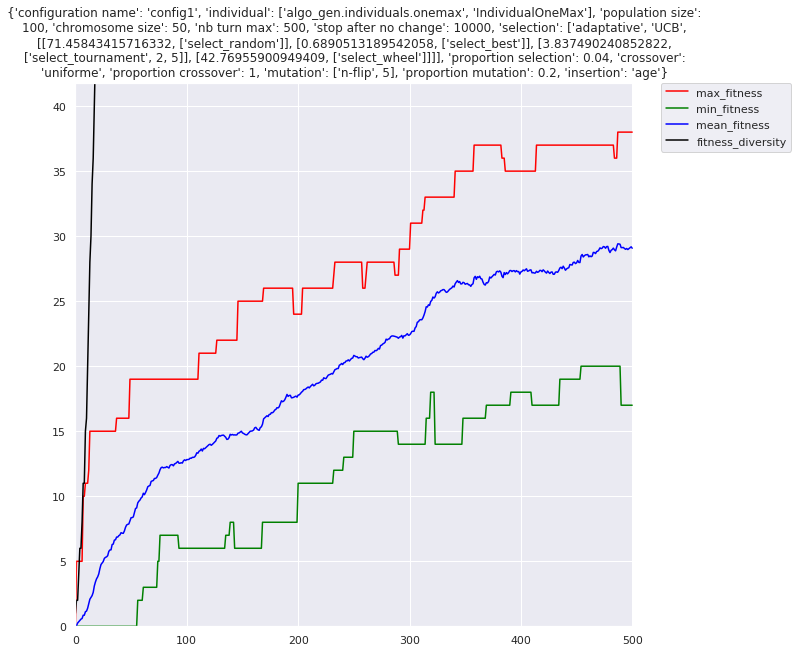

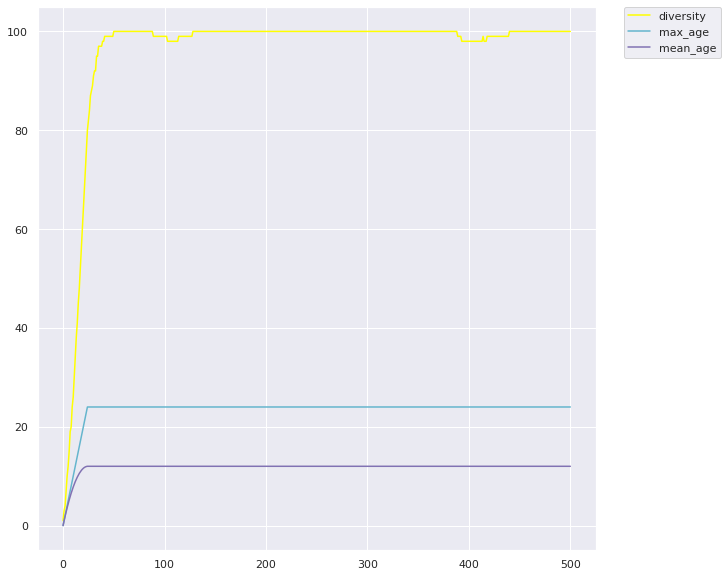

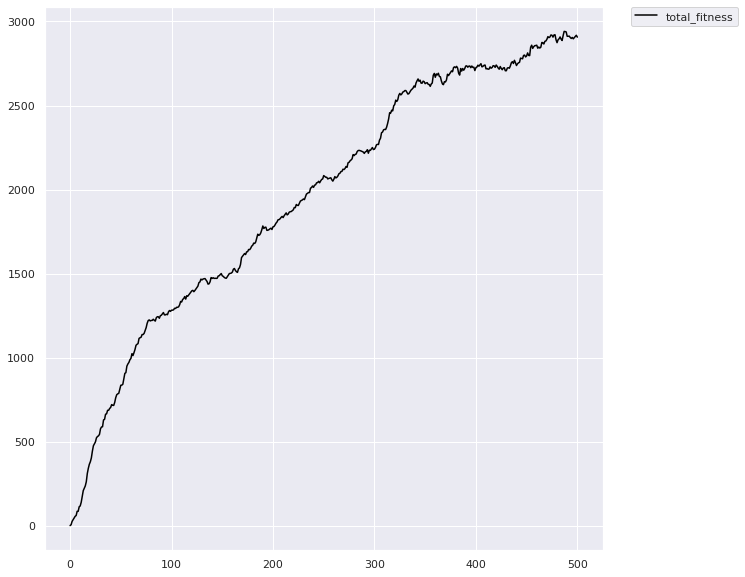

In [3]:
parameters['insertion'] = 'age'
population = Population(parameters)
population.start()
show_stats(population.stats)

# Etude spécifique des parametres

    choisir une config "neutre":
        
        taille one max 100, tournois 5-2, croisement uniforme, bit flip, age
        
        varier taille pop 5 -> 100
        
    fixer la taille 20/30
    
        étude des selections (reste fixe)
        
            diff composants/operateurs

    => bonne config
    
        tournois 5-2 =, crossover uniforme, bit flip, fitness
        

    varier tx mutation
    tx croisement
    
    comparaison de diff config
    
    
ParamILS revac irace



In [4]:
from collections import Counter
from random import randint


def weighted_random(pairs):
    total = sum(pair[0] for pair in pairs)
    r = randint(1, total)
    for (weight, value) in pairs:
        r -= weight
        if r <= 0:
            return value


results = Counter(
    weighted_random([(1, 'a'), (1, 'b'), (18, 'c')]) for _ in range(20000))
print(results)

Counter({'c': 18017, 'b': 992, 'a': 991})


In [5]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

In [6]:
import random
print(random.choices(
    ['apple', 'gun', 'pizza', 'sword', 'pasta', 'chicken', 'elephant'], 
    [0.1, 0.3, 0.1, 0.2, 0.1, 0.1, 0.1],
    k=3))
# results = Counter(tuple(random.choices(
#     ['apple', 'gun', 'pizza', 'sword', 'pasta', 'chicken', 'elephant'], 
#     [0.1, 0.3, 0.1, 0.2, 0.1, 0.1, 0.1],
#     k=3) for _ in range(20000)))
# print(results)

['apple', 'gun', 'sword']


In [7]:
def choices_no_replacement(population, weights, k=1):
    population = list(population)
    weigths = list(weights)    
    result = []
    for n in range(k):
        pos = random.choices(
            range(len(population)), 
            weights,
            k=1
        )[0]
        result.append(population[pos])
        del population[pos], weights[pos]
    return result

In [8]:
print(choices_no_replacement(
    ['apple', 'gun', 'pizza', 'sword', 'pasta', 'chicken', 'elephant'],
    [0.1    ,  0.3 ,    -1  ,    36  ,   -12  ,    -12   ,   -12],
    k=3))

['apple', 'sword', 'gun']


In [9]:
# %%script pypy3
# import sys
# print(sys.version)